In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from pyentrp.entropy import permutation_entropy
import scipy.constants as consts

In [4]:
#import test data
df = pd.read_csv('data/filtered_crypto_usdt/BTCUSDT_1Jan2016_1d.csv')
df.shape

(1211, 15)

In [5]:
#permutation entropy
def PE(X, window):
    
    PEn = []
    
    for i in range(len(X) - window):
        try:
            X_pe = X[i:i+window]
            PE = permutation_entropy(X_pe, order=3, delay=1, normalize=True)
            PEn.append(PE)
        except:
            print(i, i+window)
    return PEn

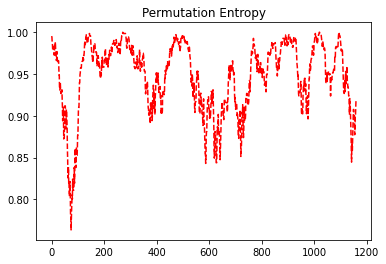

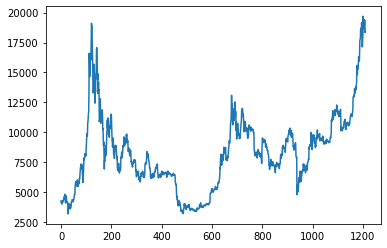

In [6]:
X = np.array(df['close'])
PEn = PE(X, 50)
plt.title('Permutation Entropy')
plt.plot(PEn, '--r')
plt.show()
plt.plot(df['close'])

In [7]:
#recurrence rate
def recurrence_rate(X, window):
    
    rp = RecurrencePlot(time_delay=1, threshold='distance', percentage=20)
    RR = []
    
    for i in range(len(X) - window):

        X_r = X[i:i+window].reshape(1,-1)
        R = rp.fit_transform(X_r)
        rr = 0
        N = len(R[0])
        rr = (1/N**2)*np.sum(R[0])
        RR.append(rr)
        
    return RR

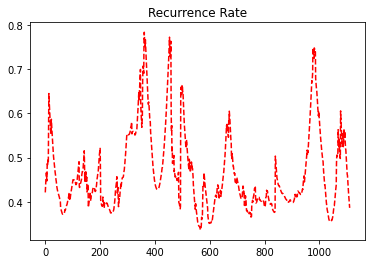

In [14]:
X = np.array(df['close'])
RR = recurrence_rate(X, 100)
plt.title('Recurrence Rate')
plt.plot(RR, '--r')
plt.show()

In [9]:
def economic_mass(X, window=50):
    h = consts.Planck
    M = []
    for i in range(len(X) - window):
        Xi = X[i:i+window]
        Xi_ = [Xi[i+1]/Xi[i] for i in range(window-1)]
        mi = 1/(np.mean(np.log(Xi_)**2) - (np.mean(np.log(Xi_)))**2)
        M.append(mi)
    return M

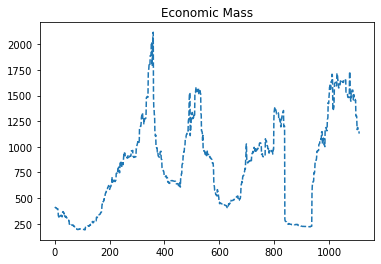

In [15]:
X = np.array(df['close'])
M = economic_mass(X, 100)
plt.title('Economic Mass')
plt.plot(M, '--')
